In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = yf.download("NVDA", start="2020-01-01", end="2023-01-01") #downloads and stores the historic data for the inputted stock.
print(data.head())

[*********************100%***********************]  1 of 1 completed

               Open     High      Low    Close  Adj Close     Volume
Date                                                                
2020-01-02  5.96875  5.99775  5.91800  5.99775   5.973123  237536000
2020-01-03  5.87750  5.94575  5.85250  5.90175   5.877517  205384000
2020-01-06  5.80800  5.93175  5.78175  5.92650   5.902165  262636000
2020-01-07  5.95500  6.04425  5.90975  5.99825   5.973620  314856000
2020-01-08  5.99400  6.05100  5.95375  6.00950   5.984824  277108000


In [40]:
data['Returns'] = (data['Adj Close'].pct_change())

data.head()

,Open,High,Low,Close,Adj Close,Volume,short_ma,long_ma,Signal,Positions,Returns
Date,,,,,,,,,,,
2020-01-02,5.96875,5.99775,5.91800,5.99775,5.973123,237536000,5.973123,5.973123,0.0,NaN,NaN
2020-01-03,5.87750,5.94575,5.85250,5.90175,5.877517,205384000,5.925320,5.925320,0.0,0.0,-0.016006
2020-01-06,5.80800,5.93175,5.78175,5.92650,5.902165,262636000,5.917602,5.917602,0.0,0.0,0.004194
2020-01-07,5.95500,6.04425,5.90975,5.99825,5.973620,314856000,5.931606,5.931606,0.0,0.0,0.012107
2020-01-08,5.99400,6.05100,5.95375,6.00950,5.984824,277108000,5.942250,5.942250,0.0,0.0,0.001876


In [42]:
past_month = yf.download("NVDA", period = "1mo") #finds the data for the past month
past_month['Returns'] = (past_month['Adj Close'].pct_change()) #The returns between each trading day is the percentage difference between two consecutive days.
past_month

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-08-19,124.279999,130.000000,123.419998,130.000000,129.988876,318333600,NaN
2024-08-20,128.399994,129.880005,125.889999,127.250000,127.239113,300087400,-0.021154
2024-08-21,127.320000,129.350006,126.660004,128.500000,128.489014,257883600,0.009823
2024-08-22,130.020004,130.750000,123.099998,123.739998,123.729416,376189100,-0.037043
2024-08-23,125.860001,129.600006,125.220001,129.369995,129.358932,323230300,0.045499
2024-08-26,129.570007,131.259995,124.370003,126.459999,126.449181,331964700,-0.022494
2024-08-27,125.050003,129.199997,123.879997,128.300003,128.289032,303134600,0.014550
2024-08-28,128.119995,128.330002,122.639999,125.610001,125.599258,448101100,-0.020967
2024-08-29,121.360001,124.430000,116.709999,117.589996,117.579941,453023300,-0.063848


C:\Users\Aadhir Vivek\AppData\Local\Temp\ipykernel_34908\4263704425.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (chunk[-1] - chunk.mean()) / chunk.std()


Text(0.5, 1.0, 'Z-Score change over date')

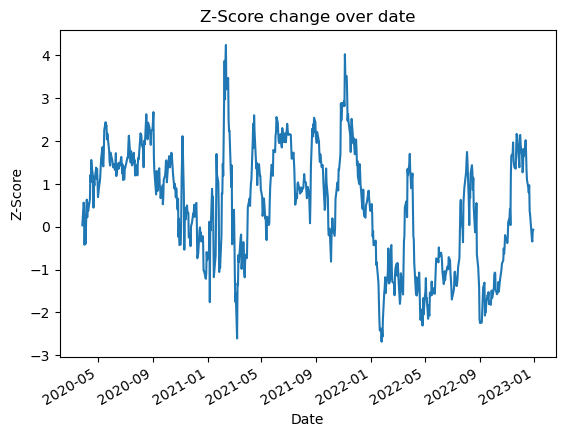

In [44]:
def z_score(chunk):
    return (chunk[-1] - chunk.mean()) / chunk.std()

rolled = data.Close.rolling(window=60).apply(z_score)
rolled.plot()
plt.ylabel('Z-Score')
plt.title('Z-Score change over date')

### Interpretation:

The chart above shows the Z score value of the stock between January 2020 to January 2023. 
A positive Z-score indicates that the stock was trading above it's mean value and a negative Z-score indicates that it was trading below mean value. Extreme spikes in the chart represent peaks(when the stock traded well above it's mean value) and dips(when the stock traded well below it's mean value)

In [47]:
mean = data['Returns'].mean()
std_dev = data['Returns'].std()
skewness = data['Returns'].skew()
kurtosis = data['Returns'].kurtosis()

print('Average return is:', mean)
print('Standard deviation is:', std_dev)
print('Skewness is:', skewness)
print('Kurtosis is:', kurtosis)

Average return is: 0.0018058615269386043
Standard deviation is: 0.035262053681355966
Skewness is: 0.03887596719082919
Kurtosis is: 2.1109919815774076


[*********************100%***********************]  1 of 1 completed


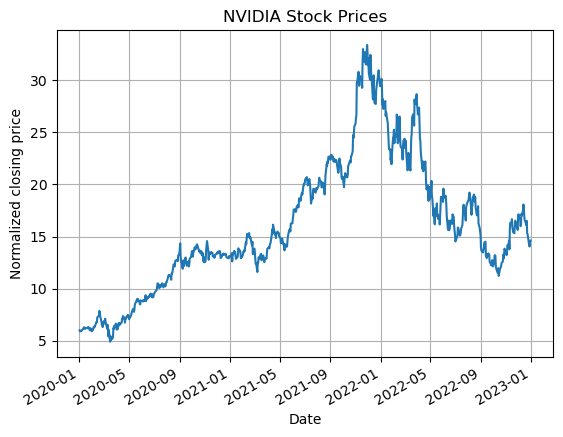

In [51]:
data = yf.download("NVDA", start="2020-01-01", end="2023-01-01")
data['Close'].plot(grid = 'Yes')
plt.ylabel('Normalized closing price')
plt.title("NVIDIA Stock Prices")
plt.show()

In [8]:
# Define the moving average windows
short_window = 40
long_window = 100
# Calculate moving averages
data['short_ma'] = data['Adj Close'].rolling(window=short_window, min_periods=1).mean()
data['long_ma'] = data['Adj Close'].rolling(window=long_window, min_periods=1).mean()

In [9]:
# Create signals
data['Signal'] = 0.0

# Generate signals only after sufficient data points
# The function generates the buy signal is the short term moving average is greater than the long term moving average and 0 otherwise.
data['Signal'] = np.where(
    data['short_ma'] > data['long_ma'], 1.0, 0.0
)

# Generate trading positions based on signal changes by calculating the change in signal between consecutive days.
# If it goes from 1 -> 0, then it's a sell signal and if it's 0 -> 1, it generates a buy signal.
data['Positions'] = data['Signal'].diff()

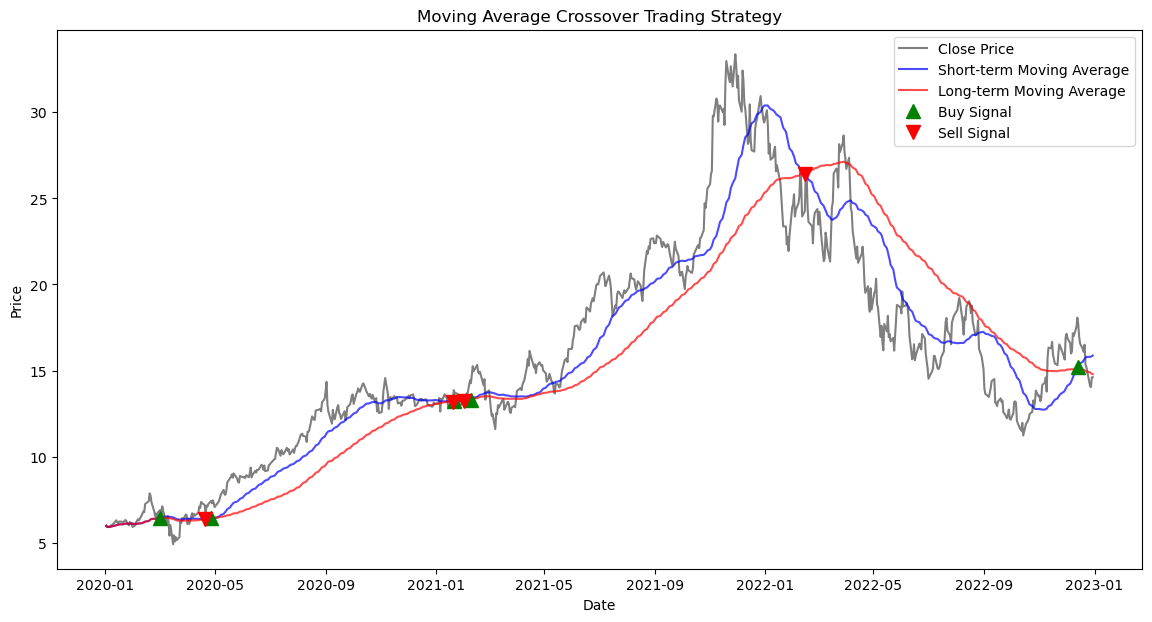

In [10]:
#Plot closing prices and moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='black', alpha=0.5)
plt.plot(data['short_ma'], label='Short-term Moving Average', color='blue', alpha=0.7)
plt.plot(data['long_ma'], label='Long-term Moving Average', color='red', alpha=0.7)

# Plot buy signals
plt.plot(data[data['Positions'] == 1].index,
         data['short_ma'][data['Positions'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot sell signals
plt.plot(data[data['Positions'] == -1].index,
         data['short_ma'][data['Positions'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('Moving Average Crossover Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Backtesting

In [11]:
#Implementing the trading strategy

cash = 100000
portfolio_value = cash
current_holding = 0
positions = []

def trade_moving_averages(cash, portfolio_value, current_holding, positions, row, date):
    #Buy signal
    trade = ''
    amount = 0
    if row['Positions'] == 1:
        #Buy the stock
        amount = cash * 0.1 #Invest 10 percent of cash each entry
        price = row['Close'] #Gets the price of the stock from the current day.
        shares_bought = amount/price
        current_holding += amount
        cash -= amount
        positions.append({'date': date, 'action': 'buy', 'shares': shares_bought, 'price': price}) #Appends the current position
        trade = 'Buy'
    
    elif row['Positions'] == -1:
        #Sell the stock
        prev_position = positions.pop()
        prev_holding = prev_position['price'] * prev_position['shares']
        shares = prev_position['shares']
        price = row['Close']
        amount = shares * price
        current_holding -= prev_holding
        cash += amount
        trade = 'Sell'

    portfolio_value = cash + current_holding
    
    
    return cash, current_holding, portfolio_value, positions

def stock_calc(frame, cash, current_holding, portfolio_value, positions):
    for date, row in frame.iterrows():
        cash, current_holding, portfolio_value, positions = trade_moving_averages(cash, portfolio_value, current_holding, positions, row, date)
    print(f'Current cash is {cash}, current holding value is {current_holding} and current portfolio value is {portfolio_value}')

In [56]:
#Funciton implementation of the code used to plot the buy and sell signals
def moving_averages(stock):
    frame = yf.download(stock, start="2020-01-1", end="2024-06-12")
    
    # Define the moving average windows
    short_window = 5
    long_window = 20
    # Calculate moving averages
    frame['short_ma'] = frame['Adj Close'].rolling(window=short_window, min_periods=1).mean()
    frame['long_ma'] = frame['Adj Close'].rolling(window=long_window, min_periods=1).mean()
    # Create signals
    frame['Signal'] = 0.0
    
    # Generate signals only after sufficient data points
    frame['Signal'] = np.where(
        frame['short_ma'] > frame['long_ma'], 1.0, 0.0
    )
    
    # Generate trading positions based on signal changes
    frame['Positions'] = frame['Signal'].diff()
    return frame

In [60]:
#Call the trading strategy, with NVIDIA stock as the stock to trade. The stock name can be changed to any stock user wishes to trade.
stock_calc(moving_averages('NVDA'), cash, current_holding, portfolio_value, positions)

[*********************100%***********************]  1 of 1 completed

Current cash is 119614.56499760409, current holding value is 13290.50722195601 and current portfolio value is 132905.0722195601


# Results:
The results show that investing in NVIDIA stock the start of 2020 to June 2024 would have yielded a gain of 32.9% on the initial investment. This analysis can be done for any stock in the yfinance library.